In [28]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [46]:
# setup security 
access_token = '1006599768104144896-08Q8MuqehWAXLYxH4qfQPd3ihda2WW'
access_token_secret = 'hZGfKdUzY1t2jUrA5t2egNhoKTPCz457orKvFVVDD117G'
consumer_key = 'mVDo4ha0iWDHYXdalHH6g8tx7'
consumer_secret = 'A6vRmL8VmLwpncQD2at0PHkzBswjT7m70BWmpv0rMkxBbvIoan'

# setup file store
file = '/Users/fabiola/Desktop/PUC/extracao-dados-web-sociais/twitter/tweets-sample-marcelo.json'

In [30]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()        

In [37]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 90 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['neymar', 'lukaku', 'messi', 'modric', 'mbappe','pogba','rakitic','cr7','hazard', 'kante', 'kane'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

**Finish**


In [38]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [49]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(100))

   lang                                               text country
0    es  RT @Danielaoksdath: Confirmaron la condena a M...    None
1    fr  RT @equipedefrance: Pendant que l’équipe qui a...    None
2    en  RT @HNS_CFF: 2⃣ days to go.\n🇭🇷Good night!\n#B...    None
3    en  RT @brfootball: Croatian politicians turned up...    None
4    en  @Joe_Dodson @Marcotti @GNev2 @GuillemBalague A...    None
5    en  RT @TenCaats: 🚨COMPETITION: If Croatia win the...    None
6    es  @elephoneiberia #FranciaCroacia Francia 0-0 Cr...    None
7    pt                         Hoje tem #Copa2018 \n\n🙌🙌🙌    None
8    en  RT @FIFAWorldCup: "We are still living our dre...    None
9    en  If there is one Croatian who isn’t happy they ...    None
10   fr  RT @ThierryASM06: @alexandreruiz mon fils Théo...    None
11   en  RT @HNS_CFF: 👋 Hey @FrenchTeam!\n🤔 Just to mak...    None
12   en  RT @nairaland: See How Pride And Ego Made This...    None
13   fr  RT @equipedefrance: Vous vous demandez comment...    

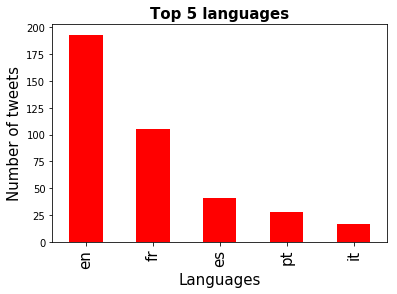

In [41]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

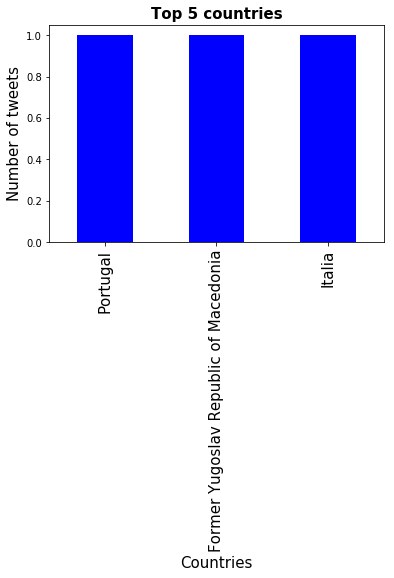

In [42]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [43]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [44]:
## filtrando aqueles q mais foram falados (termos mais influentes)
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('neymar', tweet['text']):
            players.append('neymar')
        elif word_in_text('messi', tweet['text']):
            players.append('messi')
        elif word_in_text('lukaku', tweet['text']):
            players.append('lukaku')
        elif word_in_text('modric', tweet['text']):
            players.append('modric')
        elif word_in_text('hazard', tweet['text']):
            players.append('hazard')
        elif word_in_text('mbappe', tweet['text']):
            players.append('mbappe')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('pogba', tweet['text']):
            players.append('pogba')
        elif word_in_text('rakitic', tweet['text']):
            players.append('rakitic')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('kante', tweet['text']):
            players.append('kante')
        elif word_in_text('kane', tweet['text']):
            players.append('kane')
        else:
            players.append('None')
tweets['player'] = players
tweets.head(20)

,lang,text,country,player
0,fr,RT @PassionFootClub: Après Benjamin Pavard c'e...,None,mbappe
1,pt,tudo a cair em cima do Neymar pelos erros q el...,Portugal,neymar
2,ca,@surbZ__ Modric,None,modric
3,es,RT @FichajeGoleador: 💣 BOMBAZO 💣 \n🇪🇸 Real Mad...,None,hazard
4,en,RT @xLioneI: Lionel Messi • 2012 • 91 goals in...,None,messi
5,in,"RT @Metro_TV: Kalah atau Menang, Modric Layak ...",None,modric
6,en,RT @businessinsider: This explains the Neymar ...,None,neymar
7,es,Creo que es el argumento menos argumento que h...,None,None
8,fr,RT @mcrs_10: Les dirigeants du Real auraient p...,None,neymar
9,fr,RT @beinsports_FR: 🗨️ Rakitic : ''Modric mérit...,None,modric


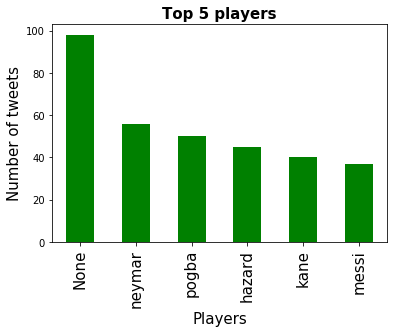

In [45]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:6].plot(ax=ax, kind='bar', color='green')

In [ ]:
## Desafio: filtrando pelas coordenadas geográficas os tweets em português
